In [95]:
import pandas as pd
from sklearn.pipeline import Pipeline

# Data vis
import seaborn as sns
import matplotlib.pyplot as plt


#NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


#ML
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [22]:
path_train = '/Users/utkarsh/Desktop/Hateful_memes/data 2/train.jsonl'
path_dev = '/Users/utkarsh/Desktop/Hateful_memes/data 2/dev.jsonl'

In [24]:
train = pd.read_json(path_train,lines= True)
dev = pd.read_json(path_dev, lines = True)

In [25]:
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [13]:
sum(train['label'])/len(train['label'])

0.3588235294117647

In [28]:
sum(dev['label'])/len(dev['label'])

0.5

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
id       8500 non-null int64
img      8500 non-null object
label    8500 non-null int64
text     8500 non-null object
dtypes: int64(2), object(2)
memory usage: 265.7+ KB


In [30]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
id       500 non-null int64
img      500 non-null object
label    500 non-null int64
text     500 non-null object
dtypes: int64(2), object(2)
memory usage: 15.7+ KB


In [82]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

In [83]:
# calcualting polarity using text blob first to see if the sentiment affects in any way
train['polarity_blob'] = train.text.apply(detect_polarity)

In [119]:
# function to compare continous variables and there difference between the presence and absence of hate-speech
def plot_distribution_num(train_select) : 
    sns.set_style("ticks") 
    s = sns.FacetGrid(train, hue = 'label',aspect = 2.5, palette =['#F3CD05', '#36688D'])
    s.map(sns.kdeplot, train_select, shade = True, alpha = 0.8)
    s.set(xlim=(-1, train[train_select].max()))
    s.add_legend()
    s.set_axis_labels(train_select, 'proportion')
    s.fig.suptitle(train_select)
    plt.show()

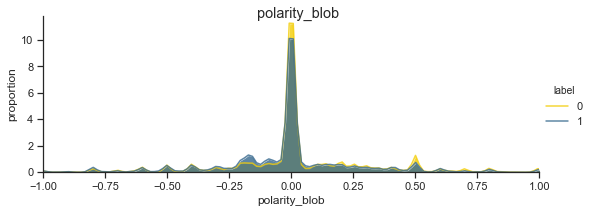

In [120]:
plot_distribution_num('polarity_blob')

In [96]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [103]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [105]:
# calcualting polarity using vader
train['polarity_vader'] = train.text.apply(sentiment_analyzer_scores)

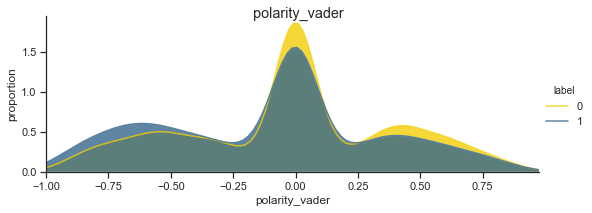

In [108]:
plot_distribution_num('polarity_vader')

In [124]:
train[train['polarity_vader']< -0.75].head(20)

,id,img,label,text,polarity_blob,polarity_vader
7,70914,img/70914.png,0,tattoos are bad for your health i know 5 milli...,-0.700000,-0.7964
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...,-0.049603,-0.8553
21,70146,img/70146.png,0,lets erect a memorial to all the americans mur...,-0.200000,-0.8402
50,10263,img/10263.png,0,rep. dan crenshaw former navy seal decorated w...,0.000000,-0.8834
62,54602,img/54602.png,1,when you just finished shooting a bunch of bla...,-0.183333,-0.8047
80,46537,img/46537.png,0,oakland mayor libby schaaf i saved 800 ms-13 r...,0.000000,-0.8750
86,90583,img/90583.png,1,we can kill as many as we want and your stupid...,-0.150000,-0.8316
103,41385,img/41385.png,0,y'all kids claims to be victims of slavery whe...,0.000000,-0.7964
111,96578,img/96578.png,1,mohammad is fucked by blink hacker group! oink...,-0.750000,-0.8770
168,15480,img/15480.png,1,we kill you on 9/11 and you elect 3 of us to c...,-0.100000,-0.8553


In [123]:
train[train['polarity_vader']> 0.75].head(20)

,id,img,label,text,polarity_blob,polarity_vader
20,2146,img/02146.png,0,from the bottom of my heart i would like to si...,0.250000,0.8807
147,69412,img/69412.png,0,best part about a hooker dying on you? the 2nd...,0.466667,0.8176
155,3258,img/03258.png,1,i heard we can get free steroids in australia ...,-0.050000,0.8013
162,5172,img/05172.png,0,islam is the religion of peace! if you don't a...,0.000000,0.7725
209,84072,img/84072.png,0,when you're fucking but wanna make sure he's n...,-0.050000,0.7874
243,35102,img/35102.png,0,please be patient... we creating a better fuck...,0.500000,0.7506
259,38629,img/38629.png,0,a good heart goes a long way,0.325000,0.7964
302,51460,img/51460.png,0,love is love respect,0.500000,0.9100
369,26043,img/26043.png,0,love is love is love is love,0.500000,0.9571
392,64027,img/64027.png,1,"""islam is love!"" - ariana grande yeah, if you'...",0.625000,0.7712


In [77]:
# creating a basic model to see performance based only on text it-self
pipe = Pipeline([
    ('tvect', TfidfVectorizer()),
    ('pac', PassiveAggressiveClassifier())
])

pipe_params = {'tvect__max_df': [0.3,0.5,0.6,1],
               'tvect__min_df': [0.1,0.2,0.4],
               'tvect__ngram_range': [(1,1),(1,2),(2,1),(2,2),(2,3),(1,3)],
               'pac__max_iter': [10,50,500],
               'pac__random_state':[915]
            }


In [78]:
x_train, y_train = train['text'], train['label']
x_dev, y_dev = dev['text'], dev['label']

In [79]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose =10,n_jobs=-1 )
gs.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [71]:
print("Best score:", gs.best_score_)

Best score: 0.5948235294117648


In [72]:
print(gs.best_estimator_)

Pipeline(memory=None,
         steps=[('tvect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=None,
                                 min_df=0.2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pac',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
              

In [73]:
y_dev_pred = gs.predict(x_dev)

In [74]:
# Defining a function to evaluate the predictions
def print_stats(preds, target, labels, sep='-', sep_len=40, fig_size=(5,5)):
    print('Accuracy = %.3f' % metrics.accuracy_score(target, preds))
    print(sep*sep_len)
    print('Classification report:')
    print(metrics.classification_report(target, preds))
    print(sep*sep_len)
    print('Confusion matrix')
    cm=metrics.confusion_matrix(target, preds)
    cm = cm / np.sum(cm, axis=1)[:,None]
    sns.set(rc={'figure.figsize':fig_size})
    sns.heatmap(cm, 
        xticklabels=labels,
        yticklabels=labels,
           annot=True, cmap = 'YlGnBu')
    plt.pause(0.05)

Accuracy = 0.482
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.77      0.60       250
           1       0.46      0.19      0.27       250

    accuracy                           0.48       500
   macro avg       0.47      0.48      0.43       500
weighted avg       0.47      0.48      0.43       500

----------------------------------------
Confusion matrix


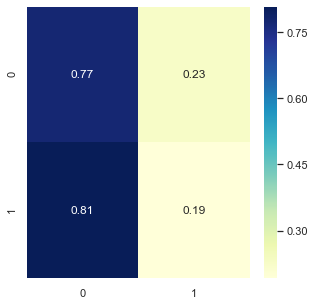

In [75]:
print_stats(y_dev_pred, y_dev, np.unique(y_dev_pred))